**Objective:**
* **Data Exploration**
* **Customer Preferences**
* **Statstical Analysis**]
* **Data Visualisation**

**import necessary libraries**

In [16]:
#import essential libraries
import numpy as np
import pandas as pd

#Importing Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [19]:
df=pd.read_csv('zomato.csv')

**Dataset first view**

In [21]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


**Dataset Rows & Columns count**

In [23]:
# Dataset Rows(observation) & Columns count(features)
print(df.shape)

(211944, 26)


**Dataset Information**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

**Duplicate Values**

In [18]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

151527

In [20]:
duplicates = df[df.duplicated()]
print(duplicates.shape)

(151527, 26)


**Missing Values/Null Values**

In [23]:
# Missing Values/Null Values Count
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

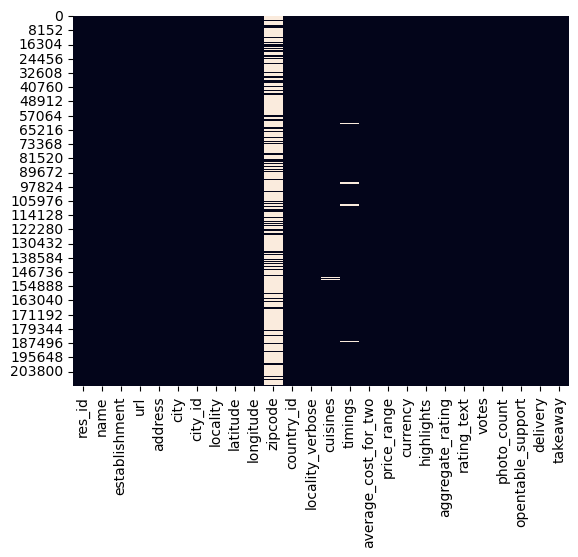

In [25]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [27]:
# Missing Value Count Function
def showMissing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = df[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = df[showMissing()].isnull().sum().sort_values(ascending = False)/len(df)*100

print(missingVal)

                   Missing Data Count  Missing Data Percentage
zipcode                        163187                76.995338
timings                          3874                 1.827841
cuisines                         1391                 0.656305
address                           134                 0.063224
opentable_support                  48                 0.022647


In [29]:
#zipcode has more null value
#therefore dropping zipcode column
df.dropna(subset=['zipcode'], inplace=True)

**Understanding your variables**

In [32]:
# Dataset Columns
print("Features",df.columns.to_list())

Features ['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id', 'locality', 'latitude', 'longitude', 'zipcode', 'country_id', 'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two', 'price_range', 'currency', 'highlights', 'aggregate_rating', 'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery', 'takeaway']


In [34]:
# Dataset Describe
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,4.875700e+04,48757.000000,48757.000000,48757.000000,48757.0,48757.000000,48757.000000,48757.000000,48757.000000,48757.000000,48754.0,48757.000000,48757.0
mean,1.012003e+07,2459.285436,21.718217,77.718027,1.0,822.069282,2.180077,3.938366,713.354390,517.372029,0.0,-0.154152,-1.0
std,8.829694e+06,4648.875374,45.645324,4.815932,0.0,808.242856,0.963150,0.650328,1377.831658,1111.080002,0.0,0.986572,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-3.000000,0.000000,0.0,-1.000000,-1.0
25%,1.200990e+05,6.000000,15.588318,74.826201,1.0,350.000000,1.000000,3.800000,100.000000,24.000000,0.0,-1.000000,-1.0
50%,1.803816e+07,12.000000,22.520768,77.219552,1.0,550.000000,2.000000,4.000000,305.000000,135.000000,0.0,-1.000000,-1.0
75%,1.871192e+07,38.000000,26.848350,80.219794,1.0,1000.000000,3.000000,4.300000,794.000000,484.000000,0.0,1.000000,-1.0
max,1.915215e+07,11354.000000,10000.000000,91.828076,1.0,30000.000000,4.000000,4.900000,42539.000000,15545.000000,0.0,1.000000,-1.0


**Variables Description**

* **res_id**:A unique identifier for each restaurant.
* **name**:The name of the restaurant.
* **establishment**:The type of establishment
* **url**:The website URL of the restaurant.
* **address**:The physical address of the restaurant.
* **city**:The city where the restaurant is located.
* **city_id**:A unique identifier for the city (often used in databases to link cities to other data).
* **locality**:A specific region, neighborhood, or district within the city where the restaurant is located.
* **latitude**:The geographic latitude coordinate of the restaurant's location.
* **longitude**:The geographic longitude coordinate of the restaurant's location.
* **country_id**:A unique identifier for the country in which the restaurant is located 
* **locality_verbose**:A more detailed description of the locality, potentially including neighborhood, district, or further clarifying the area.
* **cuisines**:A list of types of cuisine offered by the restaurant
* **timings**:The operating hours of the restaurant, often given as a schedule for each day
* **average_cost_for_two**:The estimated average cost for two people to dine at the restaurant
* **price_range**:A price classification that typically indicates the affordability of the restaurant
* **currency**:The currency used for pricing
* **highlights**: Key features or attributes of the restaurant, such as "Free Wi-Fi," "Outdoor Seating," "Pet-Friendly," "Live Music," etc.
* **aggregate_rating**:The overall rating of the restaurant based on customer reviews, often on a scale of 1 to 5 or 1 to 10.
* **rating_text**:A textual description or label accompanying the aggregate rating, such as "Excellent," "Good," "Average," or "Poor."
* **votes**:The total number of customer votes or reviews that contributed to the aggregate rating.
* **photo_count**:The number of photos uploaded by users or the restaurant, showing various aspects of the restaurant or food.
* **opentable_support**:A flag or indication that the restaurant supports OpenTable reservations (usually a "Yes" or "No" value).
* **delivery**:Indicates whether the restaurant offers food delivery services (typically a "Yes" or "No" value).
* **takeaway**:Indicates whether the restaurant offers takeaway (takeout) services (typically a "Yes" or "No" value).

**Check Unique Values for each variable**

In [39]:
# Check Unique Values for each variable.
# df.nunique()
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in res_id is 10945
No. of unique values in name is 8944
No. of unique values in establishment is 26
No. of unique values in url is 10945
No. of unique values in address is 10387
No. of unique values in city is 96
No. of unique values in city_id is 81
No. of unique values in locality is 2335
No. of unique values in latitude is 10840
No. of unique values in longitude is 10829
No. of unique values in zipcode is 1311
No. of unique values in country_id is 1
No. of unique values in locality_verbose is 2443
No. of unique values in cuisines is 3698
No. of unique values in timings is 3363
No. of unique values in average_cost_for_two is 92
No. of unique values in price_range is 4
No. of unique values in currency is 1
No. of unique values in highlights is 9150
No. of unique values in aggregate_rating is 33
No. of unique values in rating_text is 32
No. of unique values in votes is 2040
No. of unique values in photo_count is 1834
No. of unique values in opentable_support is 1
N

In [41]:
#country_id,opentable_support,takeaway column has only 1 value in dataset
df = df.drop(columns=['opentable_support', 'takeaway', 'country_id'])

**What are the most popular types of cuisines offered by restaurants?**

In [44]:
cuisines_list = []
for cuisines in df['cuisines']:
    if isinstance(cuisines, str):  
        cuisines_list.extend(cuisines.split(', ')) 
cuisines_series = pd.Series(cuisines_list)
cuisine_counts = cuisines_series.value_counts()
cuisine_df = cuisine_counts.reset_index()
cuisine_df.columns = ['Cuisine', 'Count']
cuisine_df = cuisine_df.sort_values(by='Count', ascending=False)
cuisine_df.head(10)

,Cuisine,Count
0,North Indian,22830
1,Chinese,15254
2,Fast Food,11014
3,Continental,10098
4,Italian,8071
5,Cafe,6873
6,South Indian,5529
7,Beverages,5502
8,Desserts,5452
9,Biryani,3822


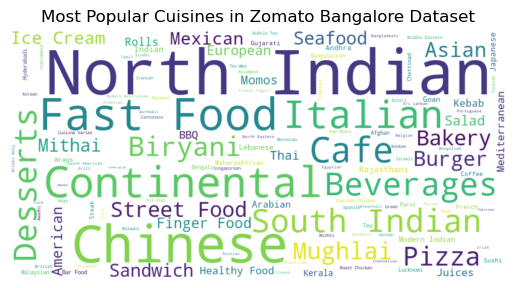

In [48]:
from wordcloud import WordCloud
cuisine_dict = cuisine_counts.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cuisine_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Most Popular Cuisines in Zomato Bangalore Dataset')
plt.show()

**Observation:**
* Amongst the cuisines offered, north Indian and Chinese are the two most preferred cuisines served.
* Fast Food ranks third, which means there is a high demand for fast, easy-to-eat food.
* The variety in Continental, Italian, and Cafe type of food seems to be a rising trend for international food in urban areas.

**Is there any relationship between the price range of a restaurant and its customer rating?**

In [52]:
correlation = df['price_range'].corr(df['aggregate_rating'])
print("Correlation between price range and customer rating:",correlation)

Correlation between price range and customer rating: 0.2470596248390201


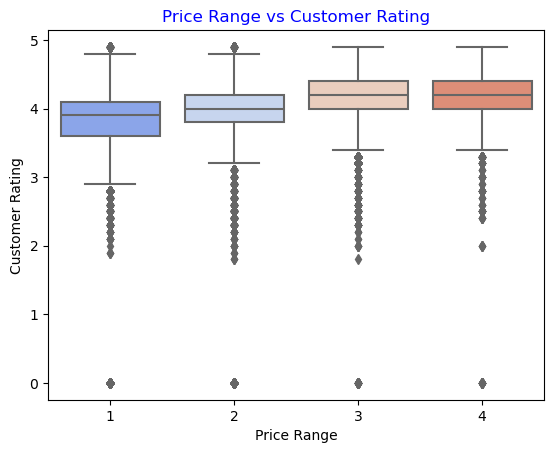

In [54]:
sns.boxplot(x='price_range', y='aggregate_rating', data=df, palette='coolwarm')
plt.title('Price Range vs Customer Rating',color='blue')
plt.xlabel('Price Range')
plt.ylabel('Customer Rating')
plt.show()

**Observation:**
* There is positive correlation between price range and customer rating which means restaurant with higher price range tends to have slightly higher rating.
* Price range 1 has lowest median rating.
* Price range2 has median rating slightly higher than range 1.
* Price range 3 shows the highest median rating.
* Price range 4 has slightly lowest median rating than 3 but higher than 1 and 2. 

**Which cities have the highest number of top-rated restaurants?**

In [58]:
df1= df[df['aggregate_rating'] > 4]
a = df1['city'].value_counts().reset_index()
a.columns = ['city', 'top_rated_count']
a = a.sort_values(by='top_rated_count', ascending=False)
a

,city,top_rated_count
0,Chennai,2467
1,Mumbai,2060
2,Bangalore,1681
3,Lucknow,1310
4,Pune,1196
...,...,...
74,Manipal,9
75,Faridabad,6
76,Howrah,3
77,Gandhinagar,1


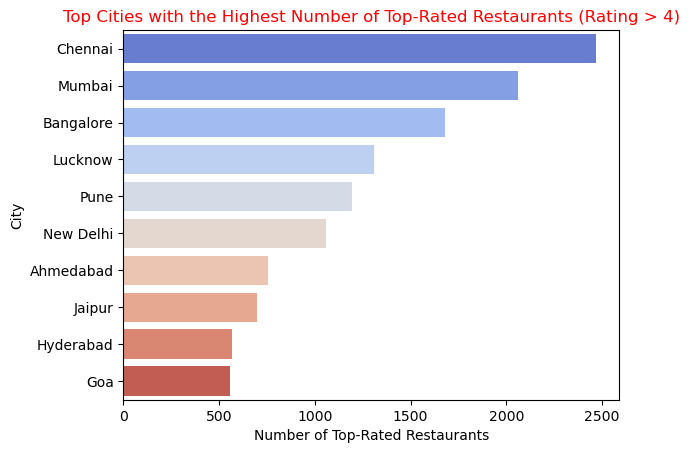

In [60]:
sns.barplot(x='top_rated_count', y='city', data=a.head(10), palette='coolwarm')
plt.title('Top Cities with the Highest Number of Top-Rated Restaurants (Rating > 4)',color='red')
plt.xlabel('Number of Top-Rated Restaurants')
plt.ylabel('City')
plt.show()

**Observation:**
* Chennai has the highest no of top rated restaurants with a rating greater than 4 followed by Mumbai and Banglore.

**What percentage of restaurants offer delivery services?**

In [67]:
delivery= df[df['delivery'] == 1].shape[0]
total = df.shape[0]
per= (delivery/ total) * 100
print("Percentage of restaurants offering delivery",per)

Percentage of restaurants offering delivery 42.14574317533892


**Observation:**
* almost half of the restaurants are providing delivery options, which could be a key factor in attracting customers who prefer convenience

**Is there any relationship between photo count and customer rating**

In [71]:
correlation = df['photo_count'].corr(df['aggregate_rating'])
print("Correlation between photo count and customer rating=",correlation)

Correlation between photo count and customer rating= 0.28346539315797886


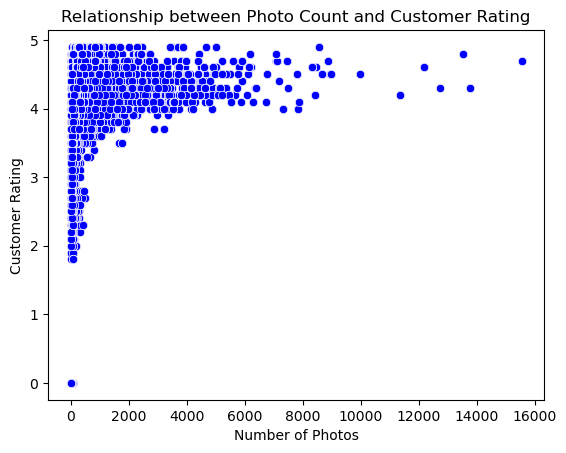

In [73]:
sns.scatterplot(x='photo_count', y='aggregate_rating', data=df, color='b')
plt.title('Relationship between Photo Count and Customer Rating')
plt.xlabel('Number of Photos')
plt.ylabel('Customer Rating')
plt.show()

**Observation:**
There is a weak positive correlation between the no of photos and customer rating .This suggest that having more photos can improve restaurant rating.

**Is there a correlation between the number of votes (votes) and the aggregate_rating of a restaurant?**

In [77]:
correlation = df['votes'].corr(df['aggregate_rating'])
print("Correlation between votes and customer rating=",correlation)

Correlation between votes and customer rating= 0.27367430071040644


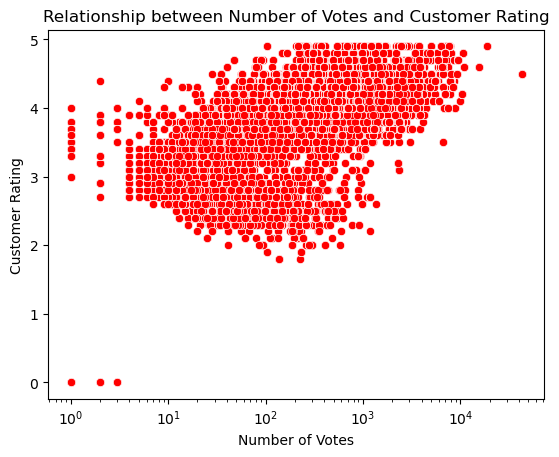

In [79]:
sns.scatterplot(x='votes', y='aggregate_rating', data=df, color='r')
plt.title('Relationship between Number of Votes and Customer Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Customer Rating')
plt.xscale('log') 
plt.show()

**Obseravtion:**
* There is a positive correlation between no of votes and customer rating.This suggest tha as the no of votes increases customer rating tends to improve.

**How do customer ratings distribute across different price ranges?**

In [83]:
a= df.groupby('price_range')['aggregate_rating'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
a

,mean,median,std,min,max,count
price_range,,,,,,
1,3.731546,3.9,0.817974,0.0,4.9,13875
2,3.896067,4.0,0.598164,0.0,4.9,17367
3,4.143063,4.2,0.472044,0.0,4.9,12375
4,4.146751,4.2,0.441180,0.0,4.9,5140


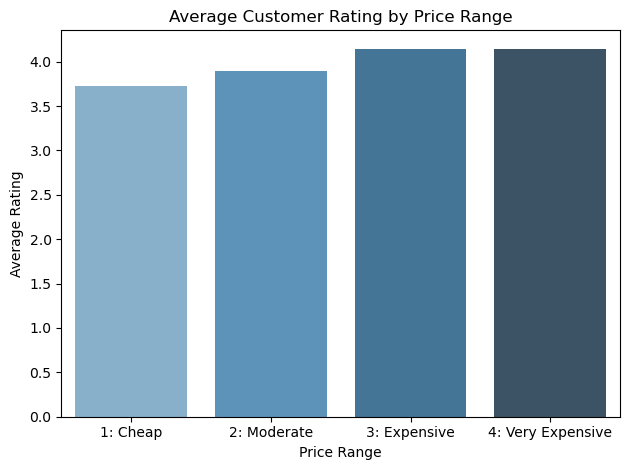

In [85]:
sns.barplot(x=a.index, y=a['mean'], palette='Blues_d')
plt.title('Average Customer Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks([0, 1, 2, 3], ['1: Cheap', '2: Moderate', '3: Expensive', '4: Very Expensive'])
plt.tight_layout()
plt.show()

**Observation:**
* There is a positive correlation between price range and customer rating.This suggests as the price increases customer rating also increases.

**Do restaurants in higher price ranges receive more customer votes than those in lower price ranges?**

In [89]:
a= df.groupby('price_range').agg(avg=('aggregate_rating', 'mean'),total=('votes', 'sum')).reset_index()
a

,price_range,avg,total
0,1,3.731546,5046760
1,2,3.896067,11660900
2,3,4.143063,13535646
3,4,4.146751,4537714


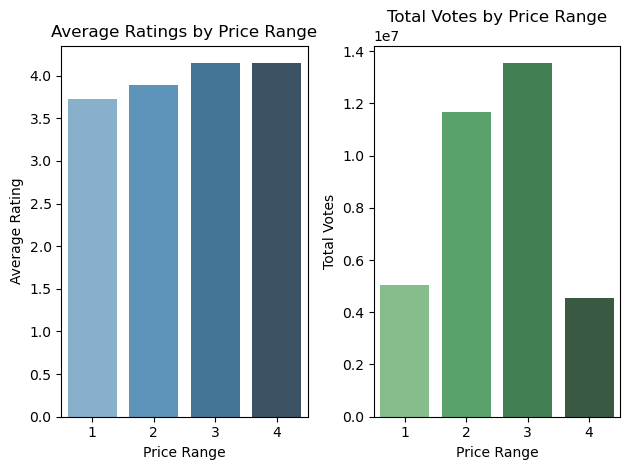

In [95]:
plt.subplot(1, 2, 1)
sns.barplot(x='price_range', y='avg', data=a, palette='Blues_d')
plt.title('Average Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
sns.barplot(x='price_range', y='total', data=a, palette='Greens_d')
plt.title('Total Votes by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Votes')
plt.tight_layout()
plt.show()

**Observation:**
* Average value increases as the Average price increases
* The total varies significantly with the price range, but it does not increase or decrease monotonically.

**How does the price range of restaurants vary across different cities?**

In [98]:
a= df.groupby('city')['price_range'].mean().reset_index()
a= a.sort_values(by='price_range', ascending=False)
a

,city,price_range
21,Goa,3.392180
63,Neemrana,3.000000
15,Dehradun,2.868231
25,Gurgaon,2.851107
71,Puducherry,2.803005
...,...,...
36,Jamnagar,1.137339
23,Greater Noida,1.111111
92,Vellore,1.000000
40,Junagadh,1.000000


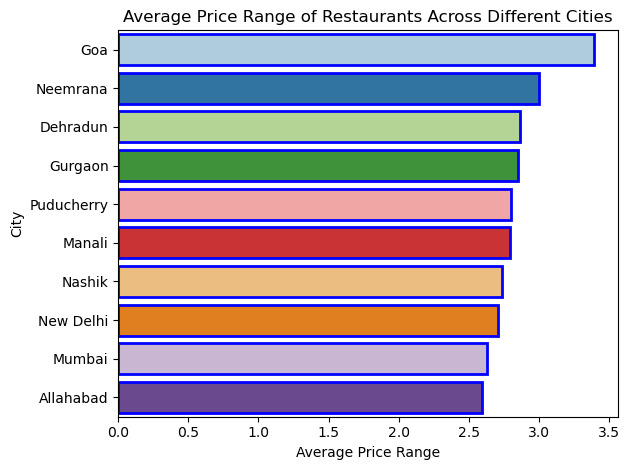

In [100]:
sns.barplot(x='price_range', y='city', data=a.head(10), palette='Paired',linewidth=2,edgecolor='b')
plt.title('Average Price Range of Restaurants Across Different Cities')
plt.xlabel('Average Price Range')
plt.ylabel('City')
plt.tight_layout()
plt.show()

**Observation:**
* Goa has a relatively high price range of 3.39.
* Neemrana follows with 3.00

**Which cuisines are most likely to offer delivery and takeaway services?**

In [103]:
df1 = df[(df['delivery'] == 1)]
a= df1['cuisines'].str.split(',').explode().str.strip()
b = a.value_counts()
b.head()

cuisines
North Indian    9510
Chinese         6655
Fast Food       5725
Continental     3672
Cafe            3206
Name: count, dtype: int64

**Observation:**
* North Indian cuisine remains the favorite, with Chinese and Fast Food at its heels.
* Continental and Cafe establishments continue to find their niche, and cafes have emerged as a favorite

**Does offering delivery correlate with higher or lower customer satisfaction?**

In [106]:
df1 = df[df['delivery'] != -1]
correlation = df1['delivery'].corr(df1['aggregate_rating'])
print("Correlation between delivery and aggregate rating:")
print(correlation)

Correlation between delivery and aggregate rating:
0.02127188776751572


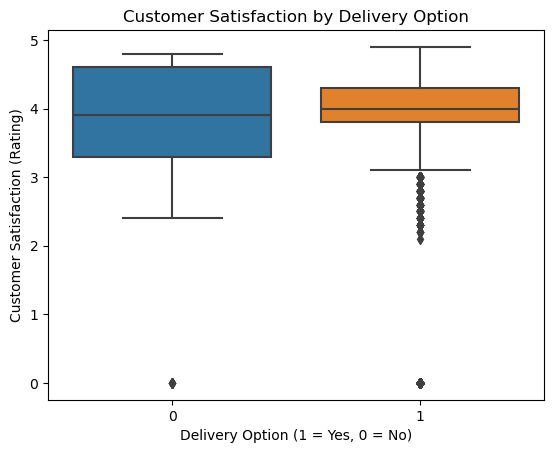

In [108]:
sns.boxplot(x='delivery', y='aggregate_rating', data=df1)
plt.title('Customer Satisfaction by Delivery Option')
plt.xlabel('Delivery Option (1 = Yes, 0 = No)')
plt.ylabel('Customer Satisfaction (Rating)')
plt.show()

**Observation:**
The correlation coefficient of 0.0213 is very close to 0, suggesting that there is virtually no significant linear relationship between the two variables. The value is extremely low, meaning that changes in delivery do not meaningfully correlate with changes in the aggregate rating.

**Which localities have the highest concentration of highly-rated restaurants (ratings > 4.5)?**

In [111]:
df1= df[df['aggregate_rating'] > 4.5]
a= df1['locality'].value_counts()
print(a.head())

locality
Tajganj           80
Indiranagar       73
Nungambakkam      58
Ana Sagar Lake    56
Chowk             56
Name: count, dtype: int64


**Observation:**
Tajganj appears to be the most popular locality in this dataset with 80 restaurants or businesses listed, followed by Indiranagar with 73 occurrences.

**What are the most commonly listed highlights across all restaurants?**

In [116]:
a= df['highlights'].dropna().str.split(',').explode().str.strip()
b = a.value_counts()
print(b.head(10))

highlights
'Cash'                  39259
'Takeaway Available'    37161
'Indoor Seating'        35720
'Credit Card'           33521
'Debit Card'            32138
'Lunch'                 29211
'Dinner'                28669
'Delivery'              27505
'Air Conditioned'       23747
['Dinner'               13358
Name: count, dtype: int64


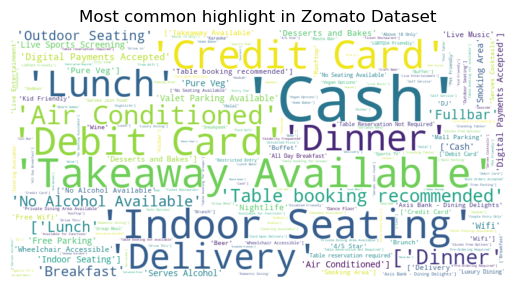

In [120]:
from wordcloud import WordCloud
c= b.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(c)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Most common highlight in Zomato Dataset')
plt.show()

**Observation:**
* The feature 'Cash' appears to be the most prevalent, with 39,259 occurrences, suggesting that cash payment is a standard offering across a significant portion
* 'Takeaway Available' and 'Indoor Seating' follow closely behind, reflecting the widespread availability of takeaway options and indoor seating in the listed restaurants.
* Both 'Credit Card' and 'Debit Card' are available in a substantial number of restaurants
* 'Lunch' (29,211 occurrences) and 'Dinner' (28,669 occurrences) appear prominently, highlighting the importance of these meal timings in the restaurant industry.

**Is there a correlation between the type of customer feedback (e.g., "Good," "Excellent") and the average cost for two?**

In [330]:
rating_map = { 'Excellent': 5,'Very Good': 4,'Good': 3,'Average': 2,'Poor': 1}
df['rating_numeric'] = df['rating_text'].map(rating_map)
correlation = df['rating_numeric'].corr(df['average_cost_for_two']) 
print("Correlation between customer feedback (rating) and average cost for two:")
print(correlation)

Correlation between customer feedback (rating) and average cost for two:
0.31122084314968523


/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_7989/577508988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_numeric'] = df['rating_text'].map(rating_map)


**Observation:**
* A correlation value of 0.31 suggests a mild positive relationship between customer ratings and average cost for two.
* This meanss that as the average cost for two increases, there is a tendency for the customer ratings to also increase, though the relationship is not very strong.

**How does the average cost for two people correlate with customer ratings in different cities?**

In [30]:
a= df.groupby('city').agg(average_rating=('aggregate_rating', 'mean'),average_cost_for_two=('average_cost_for_two', 'mean')).reset_index()
correlation= a[['city', 'average_rating', 'average_cost_for_two']]
correlation['correlation'] = correlation['average_rating'].corr(correlation['average_cost_for_two'])
print(correlation)

          city  average_rating  average_cost_for_two  correlation
0         Agra        3.493860            674.897025     0.419716
1    Ahmedabad        3.813978            696.018343     0.419716
2        Ajmer        3.554623            348.519988     0.419716
3    Alappuzha        0.858842            368.691830     0.419716
4    Allahabad        3.485248            441.938534     0.419716
..         ...             ...                   ...          ...
94    Varanasi        3.667730            528.927092     0.419716
95     Vellore        2.987788            317.788018     0.419716
96  Vijayawada        3.618026            457.965709     0.419716
97       Vizag        3.640094            524.356199     0.419716
98    Zirakpur        3.236576            669.844358     0.419716

[99 rows x 4 columns]


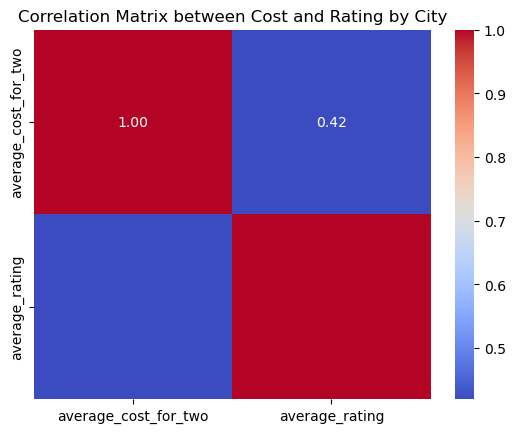

In [34]:
sns.heatmap(a[['average_cost_for_two', 'average_rating']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Cost and Rating by City')
plt.show()

**Observation:**
* The correlation value of 0.42 across all cities indicates a moderate positive relationship between average cost for two and average rating.
* cities where the average cost for two is higher tend to have higher ratings, but the relationship is not very strong or direct

**Does the locality  of a restaurant influence its customer rating?**

In [37]:
a= df.groupby('locality').agg(average_rating=('aggregate_rating', 'mean')).reset_index()
a

,locality,average_rating
0,"32nd Avenue, NH8, Gurgaon",4.130000
1,"800 Jubilee, Jubilee Hills",4.150000
2,"Hotel Somdeep Palace, Vijay Nagar",4.471429
3,"ILD Trade Centre Mall, Sohna Road",4.400000
4,InterContinental Chennai Mahabalipuram Resort...,4.442857
...,...,...
3726,Zone By The Park,3.721053
3727,"Zone by The Park, Pallikaranai",3.766667
3728,"Zone by the Park, Bani Park",3.600000
3729,Zoo Tiniali,3.821406


**Observation:**
* The range of average rating based on location is very clear; premium areas receive higher ratings above 4.0, and budget-friendly options receive lower ratings around 3.6–3.8.
* Customer satisfaction is usually higher in well-established premium locations.

**How does the number of votes (votes) vary across different types of establishments**

In [40]:
df['establishment'] = df['establishment'].apply(lambda x: x.strip("[]").strip() if isinstance(x, str) else x)
a= df.groupby('establishment')['votes'].describe()
a

,count,mean,std,min,25%,50%,75%,max
establishment,,,,,,,,
,4827.0,226.303294,423.907824,0.0,5.00,30.0,241.00,3173.0
'Bakery',8282.0,122.899541,345.114537,-18.0,4.00,22.0,101.75,5586.0
'Bar',6553.0,919.538227,1522.258377,0.0,16.00,218.0,1241.00,10511.0
'Beverage Shop',5571.0,82.011309,170.065022,0.0,3.00,20.0,99.00,3227.0
'Bhojanalya',1400.0,36.425714,79.152752,0.0,1.00,5.0,26.00,528.0
'Butcher Shop',170.0,48.394118,78.377353,0.0,11.25,34.5,59.50,915.0
'Café',22760.0,339.655185,775.766103,0.0,21.00,108.0,355.00,15582.0
'Casual Dining',61808.0,562.926676,1225.582097,-3.0,42.00,192.0,567.00,42539.0
'Club',340.0,353.555882,451.877786,0.0,71.00,184.0,572.00,2670.0


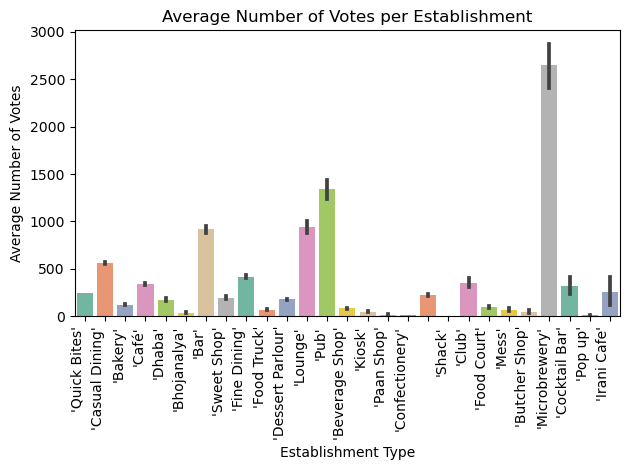

In [42]:
sns.barplot(x='establishment', y='votes', data=df, estimator='mean', palette='Set2')
plt.title('Average Number of Votes per Establishment')
plt.xlabel('Establishment Type')
plt.ylabel('Average Number of Votes')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


**Observation:**
* Categories like 'Café' (22,760), 'Casual Dining' (61,808), and 'Quick Bites' (64,390) have extremely high counts
* 'Bar' (919.54), 'Pub' (1338.65), and 'Lounge' (936.48) have high standard deviations, which indicates a wide variation in the values
* Categories like 'Pop up' (6 records), 'Shack' (44 records), and 'Butcher Shop' (170 records) have much smaller sample sizes

**What is the geographical distribution of restaurants across different cities or localities?**

**Distribution by cities**

In [45]:
a= df['city'].value_counts()
a

city
Chennai          11630
Mumbai            6497
Bangalore         4971
Pune              4217
Lucknow           4121
                 ...  
Ghaziabad          132
Faridabad          124
Howrah              66
Greater Noida       33
Nayagaon            17
Name: count, Length: 99, dtype: int64

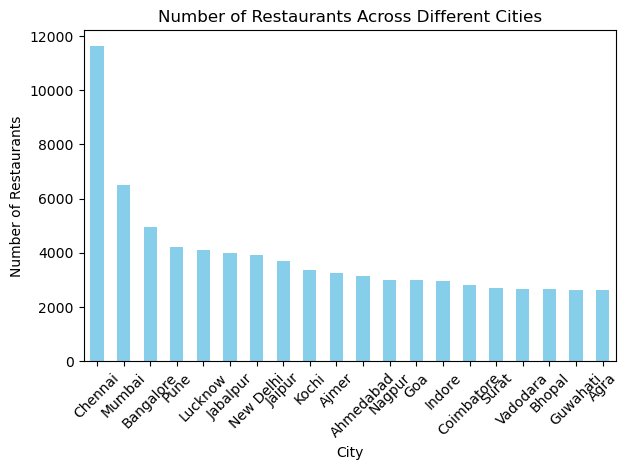

In [47]:
a.head(20).plot(kind='bar', color='skyblue')
plt.title('Number of Restaurants Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution by localities**

In [49]:
a= df['locality'].value_counts()
a

locality
Civil Lines                     3660
Model Town                      2241
Ana Sagar Lake                  1760
Vijay Nagar                     1548
Shastri Nagar                   1454
                                ... 
IBIS Hotel, Golf Course Road       1
Radisson, Udyog Vihar              1
Radha Hometel                      1
Sector 55                          1
Rockwood Restaurant                1
Name: count, Length: 3731, dtype: int64

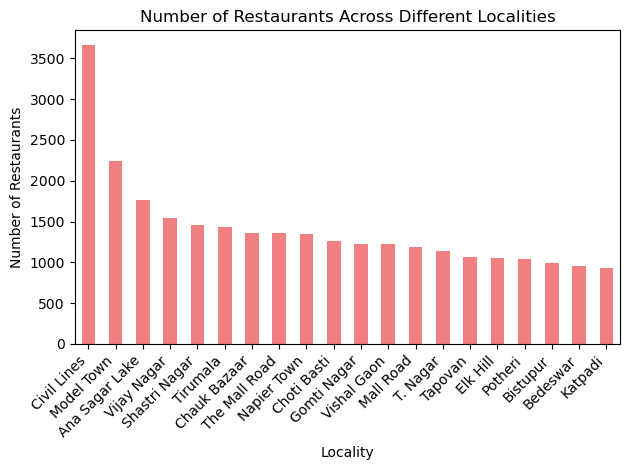

In [55]:
a.head(20).plot(kind='bar', color='lightcoral')
plt.title('Number of Restaurants Across Different Localities')
plt.xlabel('Locality')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

**How are the restaurants distributed across different price ranges?**

In [58]:
a = df['price_range'].value_counts()
a

price_range
1    85831
2    77762
3    35767
4    12584
Name: count, dtype: int64

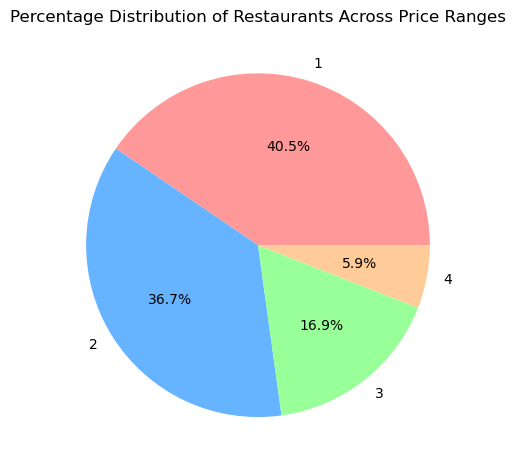

In [60]:
a.plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'])
plt.title('Percentage Distribution of Restaurants Across Price Ranges')
plt.ylabel('')  
plt.tight_layout()
plt.show()

**How do restaurant ratings vary across different locations within a city?**

In [63]:
a = df.groupby('locality')['aggregate_rating'].mean()
b =a.sort_values(ascending=False)
print(b.head())

locality
City Mall, Golghar             4.900000
Cubic Mall, Chembur            4.900000
The Orb, Chakala               4.900000
Sayaji Hotel                   4.752941
Riverside Mall, Gomti Nagar    4.714815
Name: aggregate_rating, dtype: float64


**Observation:**
* The top-rated localities (4.9) are likely premium destinations where customers have very positive experiences.
* Even with slightly lower ratings (e.g., 4.7), the establishments at Sayaji Hotel and Riverside Mall still maintain a high standard, making them attractive places for customers looking for quality experiences.

**How do ratings vary across different types of establishment**

In [66]:
a = df.groupby('establishment')['aggregate_rating'].describe()
print(a)

                     count      mean       std  min    25%  50%   75%  max
establishment                                                             
                    4827.0  3.202507  1.388746  0.0  3.100  3.7  4.00  4.9
'Bakery'            8282.0  2.823545  1.563022  0.0  2.800  3.4  3.90  4.9
'Bar'               6553.0  3.497497  1.412680  0.0  3.200  4.1  4.40  4.9
'Beverage Shop'     5571.0  2.864692  1.622216  0.0  2.900  3.5  4.00  4.9
'Bhojanalya'        1400.0  2.048000  1.714804  0.0  0.000  3.0  3.50  4.3
'Butcher Shop'       170.0  2.952941  1.209097  0.0  3.000  3.5  3.60  4.0
'Café'             22760.0  3.505980  1.178775  0.0  3.300  3.8  4.20  4.9
'Casual Dining'    61808.0  3.617792  1.121610  0.0  3.500  3.9  4.20  4.9
'Club'               340.0  3.482059  0.923729  0.0  3.400  3.7  3.90  4.5
'Cocktail Bar'        64.0  3.950000  1.153463  0.0  3.800  4.1  4.60  4.9
'Confectionery'      306.0  1.473203  1.712098  0.0  0.000  0.0  3.30  4.5
'Dessert Parlour'   7961.

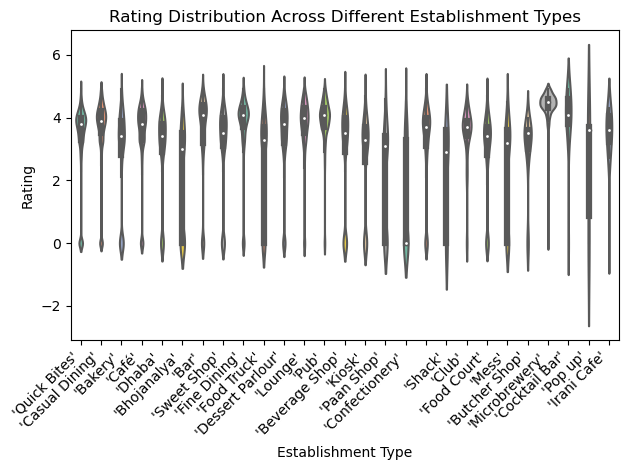

In [70]:
sns.violinplot(x='establishment', y='aggregate_rating', data=df, palette='Set2')
plt.title('Rating Distribution Across Different Establishment Types')
plt.xlabel('Establishment Type')
plt.ylabel('Rating')
plt.xticks(rotation=45,ha='right') 
plt.tight_layout()
plt.show()


**How are the numeric variables like votes, photo_count, average_cost_for_two, and aggregate_rating correlated?**

In [73]:
a= df.select_dtypes(include=[float, int])
correlations = a.corr()
print(correlations)

                        res_id   city_id  latitude  longitude  country_id  \
res_id                1.000000  0.571824  0.019338  -0.041803         NaN   
city_id               0.571824  1.000000  0.031386  -0.038496         NaN   
latitude              0.019338  0.031386  1.000000   0.047101         NaN   
longitude            -0.041803 -0.038496  0.047101   1.000000         NaN   
country_id                 NaN       NaN       NaN        NaN         NaN   
average_cost_for_two -0.208676 -0.273372 -0.008648  -0.019623         NaN   
price_range          -0.207115 -0.281038 -0.004727  -0.007658         NaN   
aggregate_rating     -0.244654 -0.263028 -0.002170   0.069011         NaN   
votes                -0.235851 -0.274275 -0.020726  -0.004032         NaN   
photo_count          -0.106507 -0.236609 -0.013380  -0.021650         NaN   
opentable_support          NaN       NaN       NaN        NaN         NaN   
delivery              0.008152  0.011540  0.011642   0.049892         NaN   

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


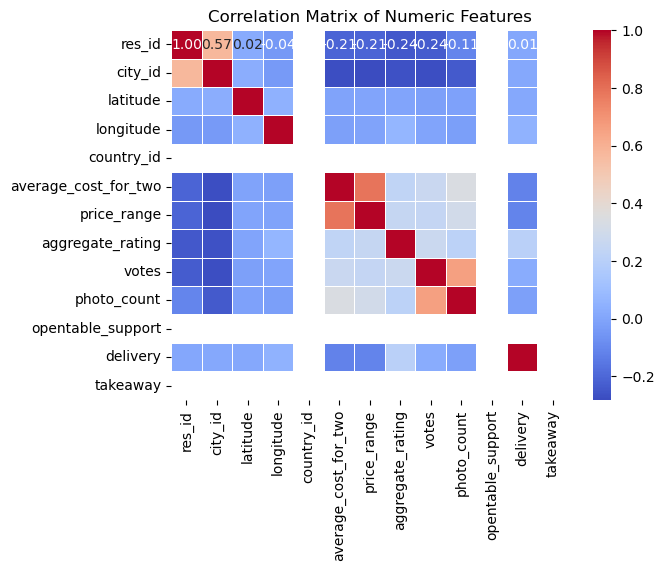

In [75]:
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

**Conclusion:**
* High Customers Satisfaction: Locations such as City Mall, Golghar, Cubic Mall, Chembur, and The Orb, Chakala, with an average rating of 4.9, show profoundly high levels of customer satisfaction.
* Establishments such as Sayaji Hotel (4.75) and Riverside Mall, Gomti Nagar (4.71) show slightly lower but still very positive ratings
* North Indian, Chinese, and Fast Food are the top three most popular cuisines
* Casual Dining and Quick Bites establishments are often linked to affordability and convenience
* High-end categories like Fine Dining, Microbrewery, and Lounge establishments also show positive ratings but with higher price points
* Certain highlights such as 'Cash' availability, 'Takeaway Available', and 'Indoor Seating' emerged as common features in highly rated establishments.
* Certain cities like Gurgaon, Goa, and Ahmedabad have seen higher average ratings